In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [16]:
from sklearn import tree, neighbors, svm
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
tv_data = pd.read_csv("aggregated_data.csv", usecols = ["week", "day", "hour", "sub_genre_id", "channel_id", "users", "program_id"])

In [3]:
tv_data["day_since"] = ((tv_data["week"] -1 )* 7) + tv_data["day"]

In [5]:
tv_data["new"] = 0

In [6]:
tv_data.head()

,week,day,hour,sub_genre_id,channel_id,program_id,users,day_since,new
0,1,1,1,1,181,366653,5,1,0
1,1,1,1,3,1,367167,20,1,0
2,1,1,1,3,4,68785,34,1,0
3,1,1,1,5,38,11568,5,1,0
4,1,1,1,9,6,177908,90,1,0


In [7]:
unique_programs_filter = tv_data.drop_duplicates(subset =["program_id"], keep = "first", inplace = False)
unique_programs_filter["new"] = int(1)
tv_data["new"].update(unique_programs_filter["new"].astype(int))

/home/yogesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
#tv_data = pd.concat([tv_data,pd.get_dummies(tv_data['program_id'], prefix='program_id')],axis=1)
#tv_data.drop(['program_id'],axis=1, inplace=True)

In [9]:
program_list = tv_data[(tv_data["week"] < 13) & (tv_data["week"] > 8) ]

In [10]:
train_data = tv_data[(tv_data["week"] < 13) & (tv_data["week"] > 8) ]
test_data = tv_data[(tv_data["week"] == 13)  & (tv_data["program_id"].isin(program_list["program_id"].unique())) ]

In [11]:
test_data.shape

(14533, 9)

In [13]:
Y_train = train_data["users"]
X_train = train_data[["day", "hour", "program_id"]]

In [14]:
Y_test = test_data["users"]
X_test = test_data[["day", "hour", "program_id"]]


In [32]:
reg = GradientBoostingRegressor(n_estimators=1500, learning_rate=0.1, max_depth=5, subsample=1.0, random_state=0, loss='ls')

In [33]:
reg.fit(X_train.values, Y_train.values)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1500, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [34]:
print (mean_squared_error(reg.predict(X_train.values),Y_train.values))

559.3397489116775


In [35]:
print (mean_squared_error(reg.predict(X_test.values),Y_test.values))

2113.8781584017083


In [181]:
#from joblib import dump, load
#dump(reg, 'model.joblib') 

['filename.joblib']

In [36]:
test_sample = test_data[(test_data["hour"] == 24) & ( test_data["day"] == 2) ]

In [37]:
test_sample["predicted"] = reg.predict(test_sample[[  "day", "hour",  "program_id"]])

/home/yogesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
test_sample.sort_values(by=['users'], ascending=False)[:10]


,week,day,hour,sub_genre_id,channel_id,program_id,users,day_since,new,predicted
207585,13,2,24,11,1,346324,165,86,0,114.115961
207613,13,2,24,31,5,220882,91,86,0,86.083391
207629,13,2,24,36,4,226965,78,86,0,103.481832
207571,13,2,24,1,2,373540,76,86,0,129.324557
207586,13,2,24,11,4,375149,51,86,0,62.898916
207609,13,2,24,30,6,5785,48,86,0,49.303270
207581,13,2,24,9,6,177908,47,86,0,31.986261
207641,13,2,24,43,5,360471,39,86,0,48.001483
207657,13,2,24,80,7,8532,36,86,0,27.577662
207579,13,2,24,5,84,375833,26,86,0,32.506935


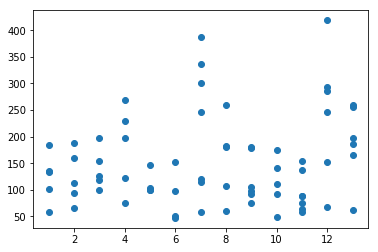

In [40]:
tmp = tv_data[(tv_data["program_id"] == 346324) & (tv_data["week"] < 14)]
plt.scatter(tmp["week"], tmp["users"]);

In [31]:
tmp["users"].rolling(5, win_type='triang').sum()/5

4797             NaN
7195             NaN
9629             NaN
11990            NaN
14384      80.133333
21738      79.133333
24123      66.466667
26495      67.533333
28894      73.266667
31280      83.200000
38684      80.333333
41077      71.666667
43428      73.666667
45790      81.666667
48199      91.066667
55516      86.600000
57890      87.933333
60120      99.133333
62517     120.400000
64916     121.066667
74559     104.466667
76948      76.666667
79387      66.533333
81825      65.133333
91629      69.533333
94165      62.800000
96452      59.466667
98988      53.133333
103741     66.333333
106094     73.600000
             ...    
140189     82.800000
142595     69.000000
144840     66.200000
144948     67.600000
147287     80.000000
149823     77.733333
157142     79.666667
159454     71.466667
161835     76.666667
164231     75.333333
166677     74.600000
173891     65.866667
173992     59.333333
176404     59.533333
178638     56.800000
178735     54.333333
181202     52

In [3]:
com_data = pd.read_csv("unique_data.csv", usecols = ["channel_id", "week", "sub_genre_id",  "program_id",  "hour", "day"])

In [4]:
com_data.drop_duplicates(subset =["program_id", "channel_id", "sub_genre_id", "week", "hour", "day"], keep = "first", inplace = True)

In [5]:
com_data.to_csv("program_id_mapping.csv")

In [179]:
com_data = pd.read_csv("unique_data.csv")

In [180]:
hour = 21
week = 13
week_day = 4
sub_genre_id = 3
channel_id = 1
data = com_data[(com_data["hour"] == hour) & (com_data["week"] == week) & (com_data["week_day"] == week_day)  & (com_data["sub_genre_id"] == sub_genre_id) & (com_data["channel_id"] == channel_id)].iloc[0]
print (data["program_id"])

378207


In [148]:
print (target_result.sort_values(by=['user_id'], ascending=False)[:10])

        week  week_day  hour  sub_genre_id  channel_id  user_id   predicted
165718    13         2    22             9           1      592  421.387971
165723    13         2    22            13           4      323  226.050612
165764    13         2    22            34           5      316  215.560291
165724    13         2    22            13           7      274  158.873981
165772    13         2    22            36           4      260  222.335967
165788    13         2    22            60           6      213  161.960145
165794    13         2    22            80         177      130   27.663324
165749    13         2    22            31           2      118  156.412069
165786    13         2    22            54           1      116  378.892574
165716    13         2    22             5           3      100  156.492012


In [164]:
output = []
for i in target_result.sort_values(by=['user_id'], ascending=False)[:10].values:
    #print (i)
    ret = []
    hour = i[2]
    week = i[0]
    week_day = i[1]
    sub_genre_id = i[3]
    channel_id = i[4]
    
    data = com_data[(com_data["hour"] == hour) & (com_data["week"] == week) & (com_data["week_day"] == week_day)  & (com_data["sub_genre_id"] == sub_genre_id) & (com_data["channel_id"] == channel_id)].iloc[0]
    #print (data["program_id"])
    ret.append(int(data["program_id"]))
    ret.append(int(i[5]))
    ret.append(int(i[6]))
    output.append(ret)
    #break
print (output)

[[172185, 592, 421], [373897, 323, 226], [237330, 316, 215], [361916, 274, 158], [226965, 260, 222], [347672, 213, 161], [5839, 130, 27], [175994, 118, 156], [378209, 116, 378], [88850, 100, 156]]


In [165]:
import json

In [166]:
json.dumps(output)

'[[172185, 592, 421], [373897, 323, 226], [237330, 316, 215], [361916, 274, 158], [226965, 260, 222], [347672, 213, 161], [5839, 130, 27], [175994, 118, 156], [378209, 116, 378], [88850, 100, 156]]'

In [190]:
s = tv_data[:10]

In [191]:
s

,week,day,hour,sub_genre_id,channel_id,program_id,user_id,new
0,1.0,1.0,1.0,1.0,181.0,366653.0,5.0,1.0
1,1.0,1.0,1.0,3.0,1.0,367167.0,20.0,1.0
2,1.0,1.0,1.0,3.0,4.0,68785.0,34.0,1.0
3,1.0,1.0,1.0,5.0,38.0,11568.0,5.0,1.0
4,1.0,1.0,1.0,9.0,6.0,177908.0,90.0,1.0
5,1.0,1.0,1.0,9.0,71.0,171447.0,2.0,1.0
6,1.0,1.0,1.0,11.0,5.0,110848.0,12.0,1.0
7,1.0,1.0,1.0,11.0,18.0,157197.0,3.0,1.0
8,1.0,1.0,1.0,11.0,28.0,109777.0,1.0,1.0
9,1.0,1.0,1.0,11.0,28.0,368026.0,1.0,1.0


In [193]:
l =pd.get_dummies(s["program_id"])

,11568.0,68785.0,109777.0,110848.0,157197.0,171447.0,177908.0,366653.0,367167.0,368026.0
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,1,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1


In [194]:
tv_data[:10]

,week,day,hour,sub_genre_id,channel_id,program_id,user_id,new
0,1.0,1.0,1.0,1.0,181.0,366653.0,5.0,1.0
1,1.0,1.0,1.0,3.0,1.0,367167.0,20.0,1.0
2,1.0,1.0,1.0,3.0,4.0,68785.0,34.0,1.0
3,1.0,1.0,1.0,5.0,38.0,11568.0,5.0,1.0
4,1.0,1.0,1.0,9.0,6.0,177908.0,90.0,1.0
5,1.0,1.0,1.0,9.0,71.0,171447.0,2.0,1.0
6,1.0,1.0,1.0,11.0,5.0,110848.0,12.0,1.0
7,1.0,1.0,1.0,11.0,18.0,157197.0,3.0,1.0
8,1.0,1.0,1.0,11.0,28.0,109777.0,1.0,1.0
9,1.0,1.0,1.0,11.0,28.0,368026.0,1.0,1.0
